TP1 - Organizacion de datos - 1er cuatrimestre 2021
--------------------
Grupo: Hakuna Ma-Data
Integrantes: 

*   102121 - Buceta Belen. 
*   102889 - Di Como, Juan Pablo.
*   97598 - Jure, Federico.
*   103026 - Companys, Gonzalo Alejo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install squarify
import squarify 
import matplotlib
import plotly.graph_objects as go
%matplotlib inline

# Limpieza de datos


Comenzamos analizando los datasets provistos. Primero tomamos el archivo train_values.csv.

In [ ]:
train_values1 = pd.read_csv('/content/train_values.csv')

In [ ]:
train_values1.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_values1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Como podemos ver, tenemos un total de 39 columnas y 260601 filas. Ninguna fila tiene valores NaN. 
Vamos a relizar una conversion de tipo de datos para ciertas columnas, dependiendo del rango de valores que toman dentro del set de datos, de manera de no utilizar memoria innecesaria.



**Conversion de datos**

Dado que vamos a cambiar el tipo de dato de todas las columnas, lo que vamos a hacer es, luego del analisis de las columnas, leer el archivo train_values.csv indicando el tipo de dato de cada columna.


*   Conversion a datos categoricos

Como bien puede leerse en el sitio de drivenData, tenemos varias columnas que presentan valores obfuscados. Estos valores que puede tomar son acotados y no numericos, de manera que vamos a convertirlos al tipo categorico. Las columnas a convertir son: 

land_surface_condition, foundation_type, roof_type, ground_floor_type, other_floor_type, position, plan_configuration, legal_ownership_status



* Conversion a datos booleanos

Tenemos un gran numero de columnas que pueden tomar unicamente dos valores {0,1} que al ser leidas por pandas se interpretan como tipos de dato int64, desperdiciando una gran cantidad de memoria innecesaria. Estas columnas, las convertimos al tipo booleano, dado que el 1 y 0 representan True or False.

Las columnas a convertir son: 

has_superstructure_mud_mortar_stone, has_superstructure_stone_flag, has_superstructure_cement_mortar_stone, has_superstructure_mud_mortar_brick, has_superstructure_cement_mortar_brick, has_superstructure_timber, has_superstructure_bamboo, has_superstructure_rc_non_engineered, has_superstructure_rc_engineered, has_superstructure_other, has_secondary_use, has_secondary_use_agriculture, has_secondary_use_hotel, has_secondary_use_rental, has_secondary_use_institution, has_secondary_use_school, has_secondary_use_industry, has_secondary_use_health_post, has_secondary_use_gov_office, has_secondary_use_use_police, has_secondary_use_other

* Conversion datos numericos

 Para esta parte, tenemos columnas que son del tipo int64 cuando el rango de valores que toman son reducidos, utilizando mas memoria de la necesitada. Para esto vamos a analizar cada unas de estas columnas y tomar decisiones.

 Lo que vamos a tomar en cuenta es el maximo y minimo valor que puede tomar la columna y ver si realmente se trata de valores enteros.

In [ ]:
def min_max(x):
  min = x.min()
  max = x.max()
  print('Min=', min, '\nMax=', max)

def are_integers(x):
 return (x % 1  == 0).all()

In [ ]:
# building_id
min_max(train_values1['building_id'])

Min= 4 
Max= 1052934


In [ ]:
are_integers(train_values1['building_id'])

True

In [ ]:
#count_floors_pre_eq
min_max(train_values1['count_floors_pre_eq'])

Min= 1 
Max= 9


In [ ]:
are_integers(train_values1['count_floors_pre_eq'])

True

In [ ]:
#age
min_max(train_values1['age'])

Min= 0 
Max= 995


In [ ]:
are_integers(train_values1['age'])

True

In [ ]:
#area_percentage
min_max(train_values1['area_percentage'])

Min= 1 
Max= 100


In [ ]:
are_integers(train_values1['area_percentage'])

True

In [ ]:
#height_percentage
min_max(train_values1['height_percentage'])

Min= 2 
Max= 32


In [ ]:
are_integers(train_values1['height_percentage'])

True

In [ ]:
#count_families
min_max(train_values1['count_families'])

Min= 0 
Max= 9


In [ ]:
are_integers(train_values1['count_families'])

True

Conociendo esto tomamos decisiones segun el tipo de dato entero que vamos a usar (np.int8/np.int16/np.int32)

In [ ]:
train_values = pd.read_csv('train_values.csv', dtype= {'building_id': np.int32,\
                                              'geo_level_1_id': np.int8,\
                                              'geo_level_2_id': np.int16,\
                                              'geo_level_3_id': np.int16,\
                                              'count_floors_pre_eq': np.int16,\
                                              'age': np.int16,\
                                              'area_percentage': np.int8,\
                                              'height_percentage': np.int8,\
                                              'land_surface_condition': 'category',\
                                              'foundation_type': 'category',\
                                              'roof_type': 'category',\
                                              'ground_floor_type':'category',\
                                              'other_floor_type': 'category',\
                                              'position': 'category',\
                                              'plan_configuration':'category',\
                                              'has_superstructure_adobe_mud':'boolean',\
                                              'has_superstructure_mud_mortar_stone':'boolean',\
                                              'has_superstructure_stone_flag':'boolean',\
                                              'has_superstructure_cement_mortar_stone':'boolean',\
                                              'has_superstructure_mud_mortar_brick':'boolean',\
                                              'has_superstructure_cement_mortar_brick':'boolean',\
                                              'has_superstructure_timber':'boolean',\
                                              'has_superstructure_bamboo':'boolean',\
                                              'has_superstructure_rc_non_engineered':'boolean',\
                                              'has_superstructure_rc_engineered':'boolean',\
                                              'has_superstructure_other':'boolean',\
                                              'legal_ownership_status':'category',\
                                              'count_families': np.int16,\
                                              'has_secondary_use':'boolean',\
                                              'has_secondary_use_agriculture':'boolean',\
                                              'has_secondary_use_hotel':'boolean',\
                                              'has_secondary_use_rental':'boolean',\
                                              'has_secondary_use_institution':'boolean',\
                                              'has_secondary_use_school':'boolean',\
                                              'has_secondary_use_industry':'boolean',\
                                              'has_secondary_use_health_post':'boolean',\
                                              'has_secondary_use_gov_office':'boolean',\
                                              'has_secondary_use_use_police':'boolean',\
                                              'has_secondary_use_other':'boolean'
                                              })

En cuanto al otro dataset provisto train_labels.csv, ya conocemos las columnas por ende leemos directo.

In [ ]:
train_labels = pd.read_csv('train_labels.csv', dtype = {'building_id': np.int32,\
                                                        'damage_grade': np.int32
                                                        })

**Memoria**

Analizamos la memoria que ahorramos convirtiendo tipos.



In [ ]:
mem_original = round((train_values1.memory_usage().sum())/(1024*1024),2)
mem_conversion = round((train_values.memory_usage().sum())/(1024*1024),2)
memoria_ahorrada = round(mem_original - mem_conversion,2)

print(' Memoria dataset original: ', mem_original, 'MB\n', 'Memoria dataset con conversion de datos: ',
      mem_conversion, 'MB\n', 'Memoria ahorrada: ', memoria_ahorrada, 'MB')

 Memoria dataset original:  77.54 MB
 Memoria dataset con conversion de datos:  17.15 MB
 Memoria ahorrada:  60.39 MB


In [ ]:
#elimino el dataset original que ya no usamos. 
del train_values1

Nota: Dado que vamos a utilizar el feature damage_grade para muchas visualizaciones, mergeamos al comienzo con train_labels para no tener que hacerlo en cada visualizacion.


In [ ]:
train_values = train_values.merge(train_labels, on ='building_id', how = 'inner')

# Analisis de los datos

# Analisis distribuciones

Lo primero que vamos a hacer, es analizar la distribucion de las columnas que, a primera vista, nos parecen de interes.

**damage_grade**

Vamos a comenzar viendo como se distribuye el grado de daño. 

Text(0, 0.5, 'Cantidad')

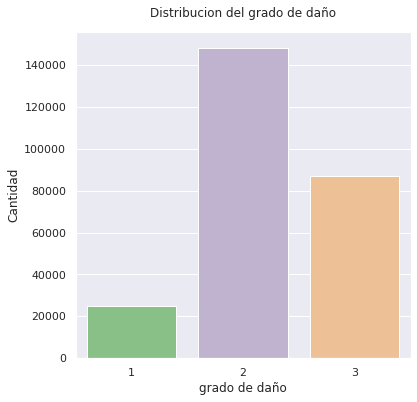

In [ ]:
damage = train_values.loc[:,['building_id','damage_grade']]
plt.figure(figsize= (6,6))
sns.set_theme(style='darkgrid')
sns.countplot(x = 'damage_grade',data = damage, palette= 'Accent')
plt.title("Distribucion del grado de daño", pad=15)
plt.xlabel("grado de daño")
plt.ylabel("Cantidad")

Con esta primera visualizacion podemos notar que solo una pequeña porcion de los datos presenta un damage_grade del tipo 1. Para ser mas precisos:

In [ ]:
damage_count = train_values.loc[:,['building_id','damage_grade']].groupby('damage_grade').agg('count').reset_index().rename(columns = {'building_id':'count'})
damage_count

,damage_grade,count
0,1,25124
1,2,148259
2,3,87218


In [ ]:
#porcentaje para damage_grade del tipo 1
(100 * damage_count[damage_count['damage_grade'] == 1]['count'])/(damage_count['count'].sum())

0    9.640792
Name: count, dtype: float64

Viendo esto ultimo podemos ver que, aproximadamente, tan solo el 10% de las observaciones presenta un damage_grade del tipo 1. Esto es algo que deberiamos tener en cuenta para las futuras preguntas que nos hagamos.

**age**

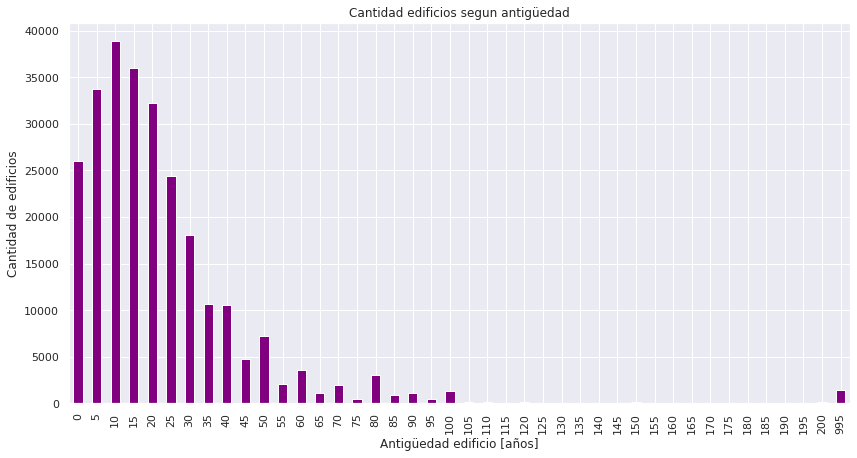

In [ ]:
fig = plt.figure(figsize = (14,7))
train_values['age'].value_counts().sort_index().plot.bar(color = 'purple')
plt.xlabel('Antigüedad edificio [años]')
plt.ylabel("Cantidad de edificios")
plt.title('Cantidad edificios segun antigüedad')
plt.savefig('line_plot.pdf')

Como podemos ver, a partir de los 55 años de antigüedad, la cantidad de edificios es muy baja. Podemos decir que esta es una distribucion sesgada a derecha. Dicho esto, es una variable con la vamos a tener que lidiar con outliers o anomalias.

Investigando un poco en google descubrimos que la presencia de edificios con una antigüedad mayor a 100 años es posible en Nepal, por lo tanto estariamos lidiando con anomalias relativas, dado que estos valores son posibles, pero la cantidad en la que se presentan en el dataset no es comparable con la de edificios con antigüedades menores.

Para tener un mejor idea de su aporte en cantidad al dataset, calculamos el procentaje de edificios con una antigüedad mayor a 55 años.

In [ ]:
age_count = train_values.loc[:,['building_id','age']].groupby('age').agg('count').reset_index().rename(columns = {'building_id':'count'})

In [ ]:
age_over_55_count = age_count.loc[age_count['age'] >= 55]

In [ ]:
#porcentage de observaciones que presentan un valor de age mayor a 55
(100 * age_over_55_count['count'].sum())/age_count['count'].sum()

6.962367757606456

Como puede verse, tan solo el 7% de las observaciones tiene valores mayores a 55 en la columna age.

**height_percentage**

Text(0.5, 1.0, 'Densidad de edificios por altura')

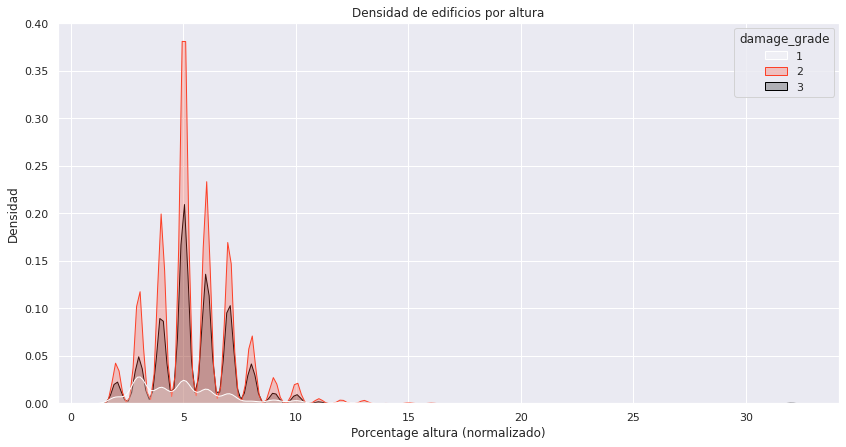

In [ ]:
height = train_values.loc[:,['height_percentage','damage_grade']]
sns.set(style="darkgrid")
f,ax = plt.subplots(figsize=(14,7))
sns.kdeplot(data = height, x = 'height_percentage', hue = 'damage_grade', palette= 'CMRmap_r', fill = True)
plt.xlabel("Porcentage altura (normalizado)")
plt.ylabel("Densidad")
plt.title("Densidad de edificios por altura")

De esta visualizacion es interesante notar que para los tipos de damage_grade 2 y 3, la densidades siguen el mismo patron, con una diferencia entre picos. Ademas, para la altura 5 vemos que tenemos la mayor concentracion para el damage_gradel del tipo 1 y 2.



**area_percentage**

Text(0.5, 1.0, 'Densidad de edificios por area')

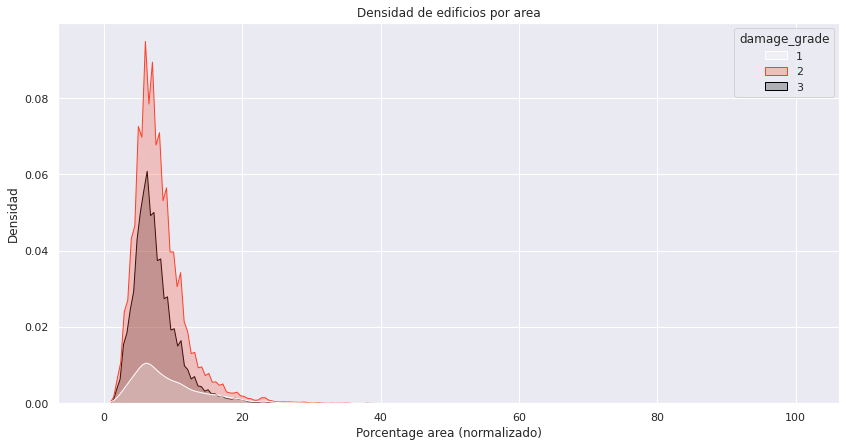

In [ ]:
area = train_values.loc[:,['area_percentage','damage_grade']]
sns.set(style="darkgrid")
f,ax = plt.subplots(figsize=(14,7))
sns.kdeplot(data = area, x = 'area_percentage', hue = 'damage_grade', palette= 'CMRmap_r', fill = True)
plt.xlabel("Porcentage area (normalizado)")
plt.ylabel("Densidad")
plt.title("Densidad de edificios por area")

Podemos ver nuevamente que se trata de una distribucion sesgada a derecha. Esto nos llevara posiblemente a tener que lidiar con outliers en el futuro. 

**plan_configuration**

Este feature nos indica el plan de configuracion con el cual se construyo el edificio. Vamos a ver con si distribuye.

In [ ]:
plan_damage = train_values.loc[:,['building_id','plan_configuration','damage_grade']]
plan_damage_plot = plan_damage.groupby(['plan_configuration','damage_grade']).agg('count').reset_index().rename(columns = {'building_id':'damage_count'})

Text(0.5, 1.0, 'Cantidad edificios por plan y grado de daño')

<Figure size 1080x576 with 0 Axes>

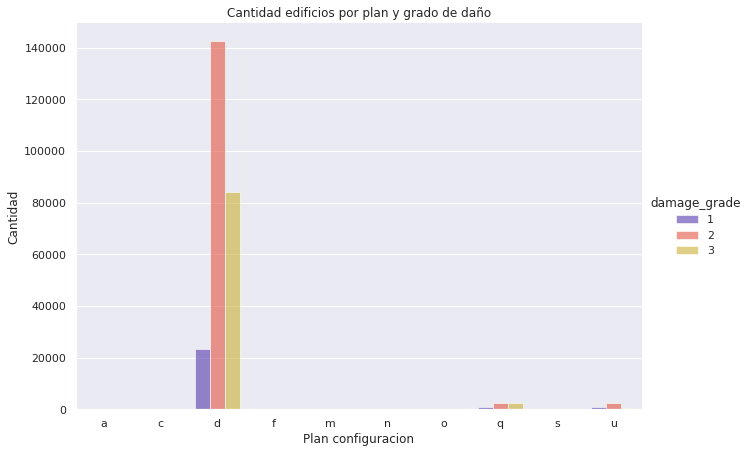

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
sns.catplot(
    data=plan_damage_plot, kind="bar",
    x="plan_configuration", y="damage_count", hue="damage_grade",
    ci="sd", palette="CMRmap", alpha=.6, height=6, aspect = 1.5
)

plt.xlabel('Plan configuracion')
plt.ylabel("Cantidad")
plt.title("Cantidad edificios por plan y grado de daño")


Puede verse que para el plan de configuracion d se acumula la mayor cantidad de edificios. Dado esto, tenemos la mayor cantidad de edificios con grado de daño 2 y 3.


Quiero ver el porcentaje de los edificos con plan de configuracion distinto a d:

In [ ]:
plan_no_d = plan_damage_plot.loc[plan_damage_plot['plan_configuration'] != 'd']
(100 * plan_no_d['damage_count'].sum()) / (plan_damage_plot['damage_count'].sum())

4.040276130943473

Aquellos planes distintos al plan d representan tan solo el 4% de nuestros datos. ¿Es posible que sean erroneos los valores colocados en el feature en cuestion para estas observaciones? ¿Existiran otras variables que lleven al edificio a tener un elevado grado de daño sin necesariamente tener el plan de configuracion d?

**land_surface_condition, foundation_type, ground_floor_type, roof_type**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


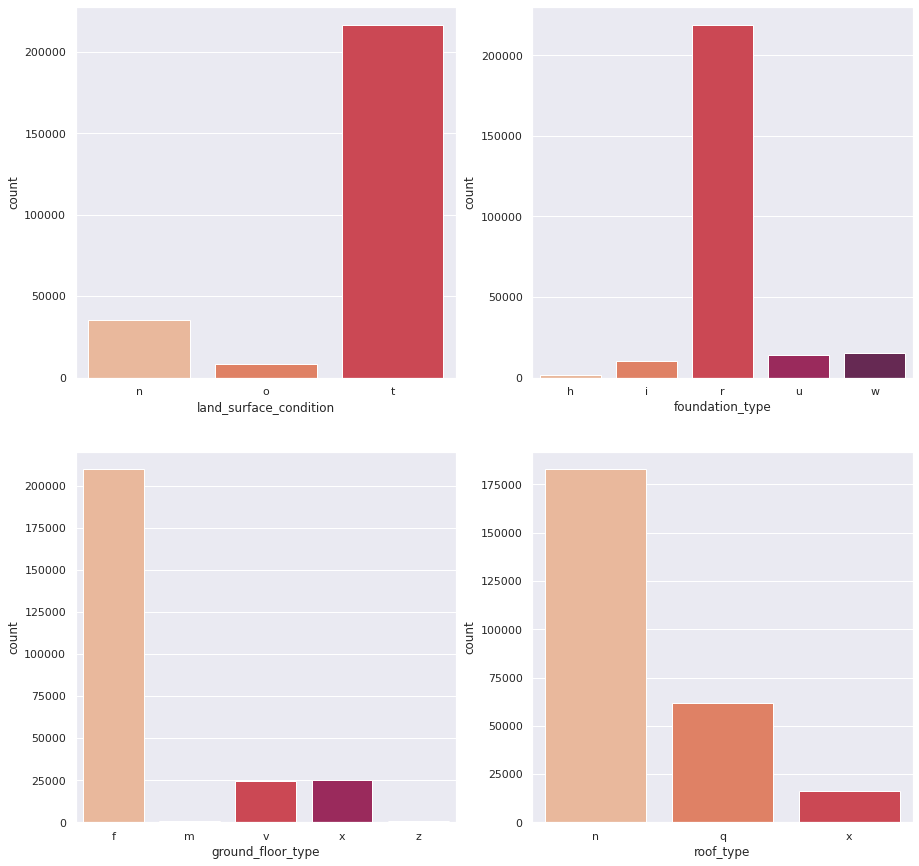

In [ ]:
countplot_data = train_values.loc[:,['land_surface_condition','foundation_type','ground_floor_type','roof_type']]
sns.set_theme(style='darkgrid', palette = "rocket_r")
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (15, 15))
sns.countplot(countplot_data['land_surface_condition'], ax = axes[0][0])
sns.countplot(countplot_data['foundation_type'], ax = axes[0][1])
sns.countplot(countplot_data['ground_floor_type'], ax = axes[1][0])
sns.countplot(countplot_data['roof_type'], ax = axes[1][1])

Podemos apreciar que para cada feature, tenemos un valor predominante:


*   land_surface_condition: predomina el valor "t"
*   foundation_type: predomina el valor "r"
*   ground_floor_type: predomina el valor "f"
*   roof_type: predomina el valor "n"



¿Que porcentaje de las observaciones del dataset presenta esta combinacion predominante de features? 

In [ ]:
cond_comb_predominante = (countplot_data['land_surface_condition'] == "t") & (countplot_data['foundation_type'] == "r") & (countplot_data['ground_floor_type'] == "f") & (countplot_data['roof_type'] == "n")
combination = countplot_data.loc[cond_comb_predominante]
(len(combination) * 100)/ (len(train_values))

45.707422458087265

Casi la mitad de nuestros datos presentan esta combinacion. Vamos a ver como es la distribucion del grado de danio para filtrando unicamente para esta combinacion. Esto lo hacemos en el apartado llamado Analisis de combinacion de features.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cantidad edificios dañados para la combinacion \n land_surface_condition: t, foundation_type: r, ground_floor_type: f y roof_type: n')

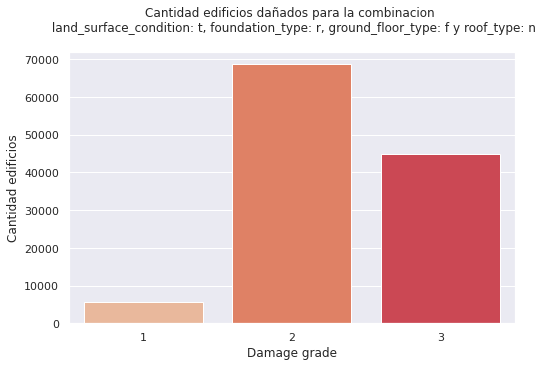

In [ ]:
comb_predominante = train_values.loc[:,['land_surface_condition','foundation_type','ground_floor_type','roof_type','damage_grade']]
comb_predominante = comb_predominante.loc[cond_comb_predominante]
plt.figure(figsize=(8,5))
sns.countplot(comb_predominante['damage_grade'])
plt.xlabel("Damage grade")
plt.ylabel("Cantidad edificios")
plt.title("Cantidad edificios dañados para la combinacion \n land_surface_condition: t, foundation_type: r, ground_floor_type: f y roof_type: n", pad =20)

Es evidente que esta esta combinacion de features aporta en gran cantidad de observaciones que han sufrido daño de grado 2 y 3.

In [ ]:
comb_predominante.groupby('damage_grade')['land_surface_condition'].agg('count').to_frame().reset_index().rename(columns = {'land_surface_condition':'count'})

,damage_grade,count
0,1,5626
1,2,68605
2,3,44883


Seria interesante encontrar las relaciones que tienen estas combinaciones de features agregando la superestructura que utiliza el edificio. Analizamos esto en el apartado Analisis de combinacion de features.

# Analisis materiales usados

Realizamos una simple visualizacion para analizar el porcentaje de cada tipo de superestructura para todas las observaciones.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


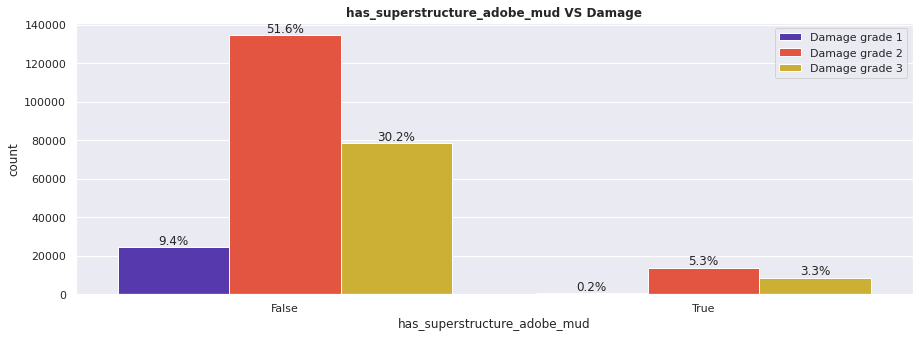

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


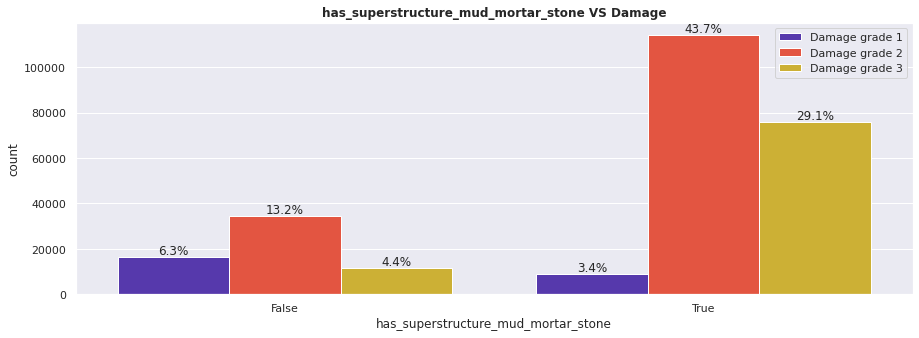

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


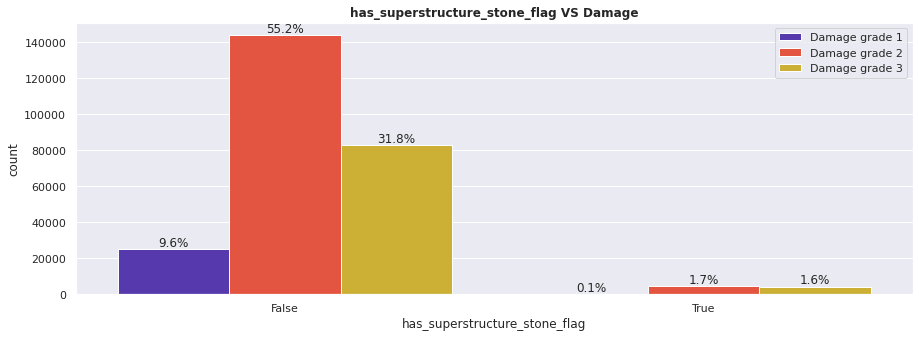

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


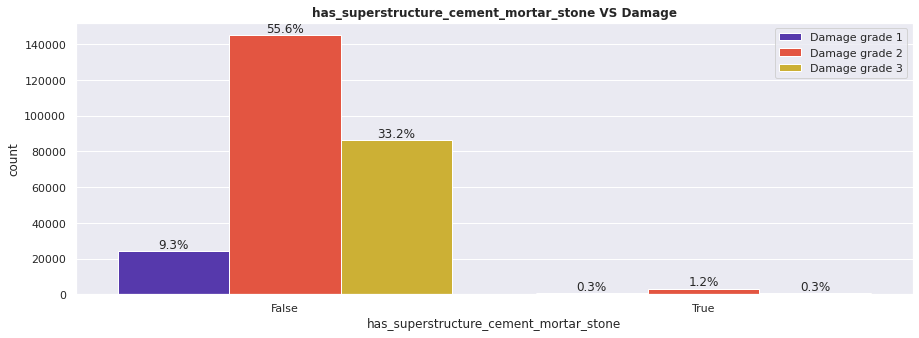

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


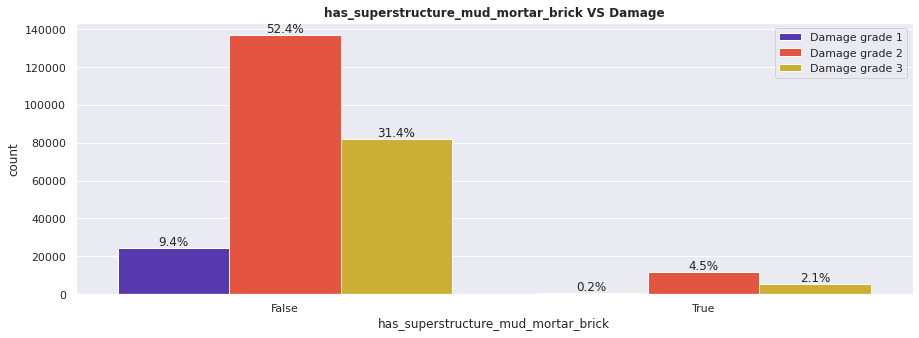

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


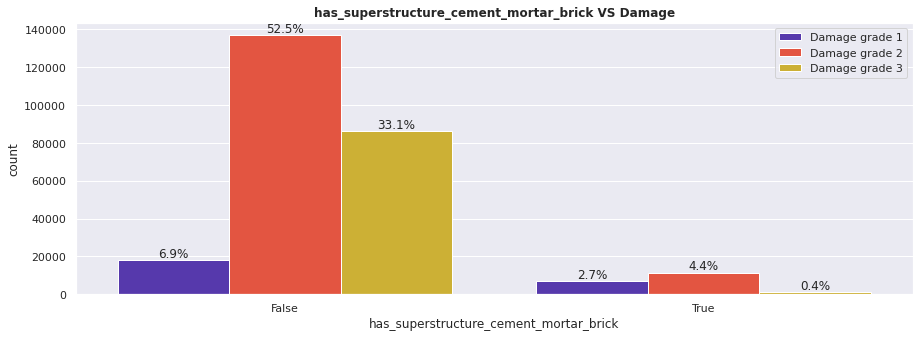

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


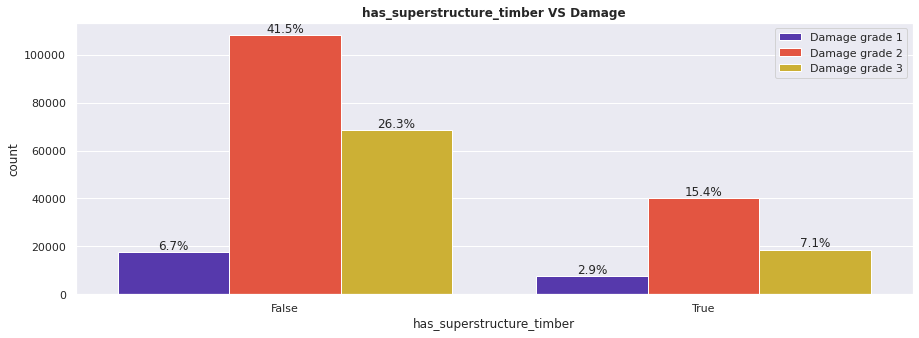

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


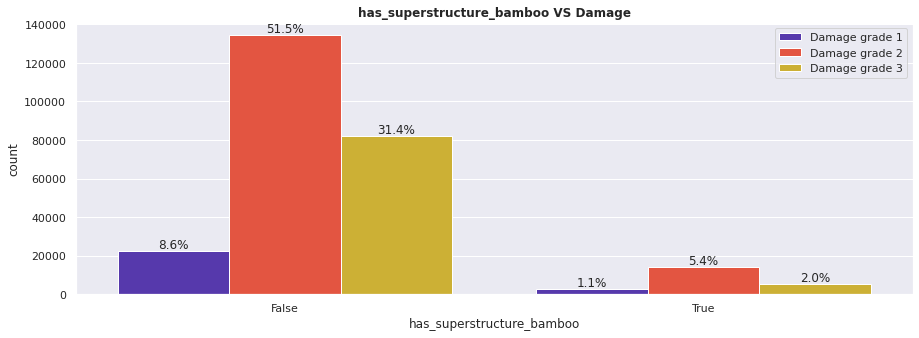

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


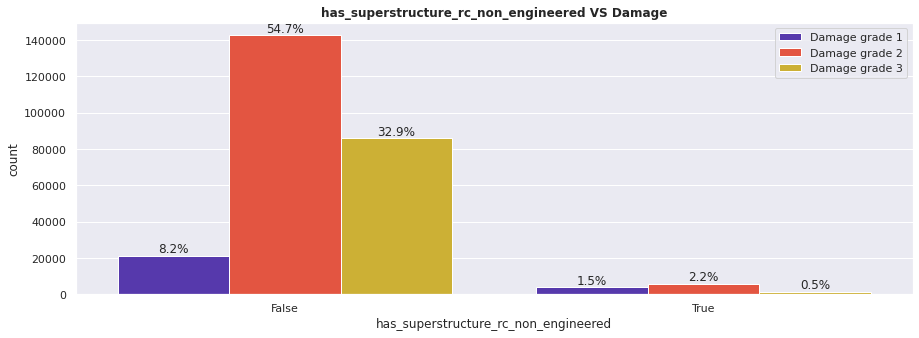

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


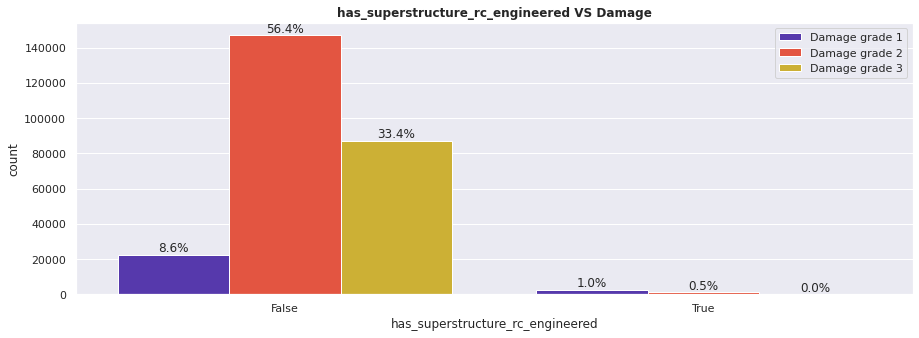

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


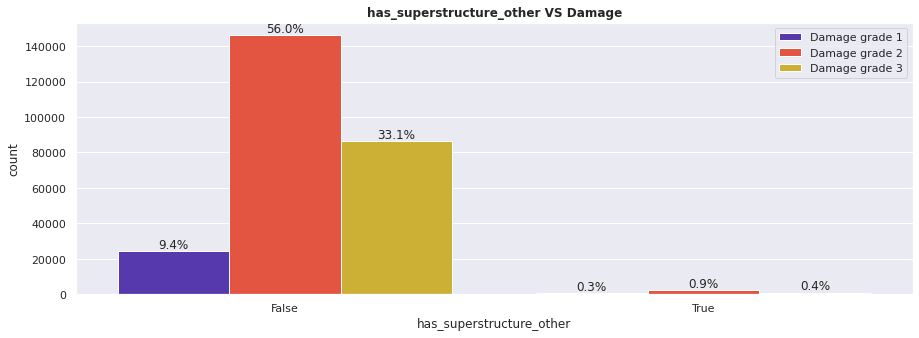

In [ ]:
materials_cols = ["has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone",
                  "has_superstructure_stone_flag","has_superstructure_cement_mortar_stone",
                  "has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick",
                  "has_superstructure_timber","has_superstructure_bamboo",
                  "has_superstructure_rc_non_engineered","has_superstructure_rc_engineered",
                  "has_superstructure_other"
                  ]

materials = train_values.loc[:,["has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone",
                  "has_superstructure_stone_flag","has_superstructure_cement_mortar_stone",
                  "has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick",
                  "has_superstructure_timber","has_superstructure_bamboo",
                  "has_superstructure_rc_non_engineered","has_superstructure_rc_engineered",
                  "has_superstructure_other","damage_grade"]]

for col in materials_cols:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(materials[col],hue=materials['damage_grade'],palette="CMRmap")
    plt.title(col+ " VS Damage",fontweight="bold")
    plt.legend(["Damage grade 1","Damage grade 2","Damage grade 3"]) 
    ncount = len(materials[col])
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom')
    plt.show()

Text(0.5, 1.0, 'Cantidad de edificios por grado de daño y tipo superestructura')

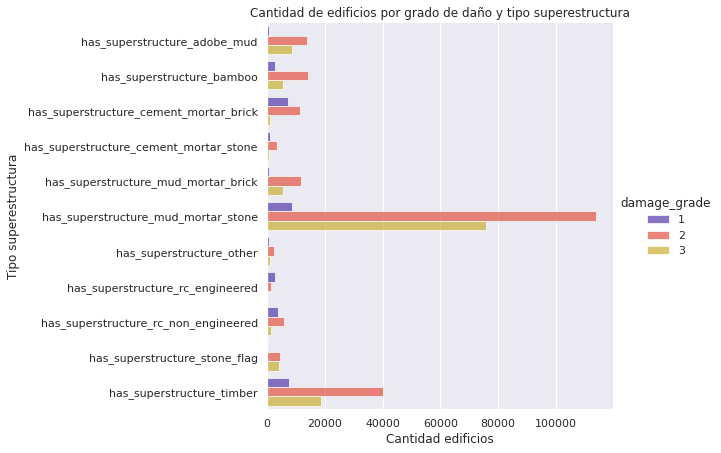

In [ ]:
materiales = train_values.loc[:, ["has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone",
                  "has_superstructure_stone_flag","has_superstructure_cement_mortar_stone",
                  "has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick",
                  "has_superstructure_timber","has_superstructure_bamboo",
                  "has_superstructure_rc_non_engineered","has_superstructure_rc_engineered",
                  "has_superstructure_other","damage_grade"]]
mat_plot = pd.melt(materiales, id_vars='damage_grade', var_name='superstructure_type', value_name='count')
mat_plot = mat_plot.groupby(['superstructure_type','damage_grade']).agg('sum').reset_index()
#plt.figure(figsize=(20,11))
sns.set_theme(style='darkgrid')
sns.catplot(
    data=mat_plot, kind="bar",
    x="count", y="superstructure_type", hue="damage_grade",
    ci="sd", palette="CMRmap", alpha=.7, height=6, aspect = 1.5)
plt.xlabel("Cantidad edificios")
plt.ylabel("Tipo superestructura")
plt.title("Cantidad de edificios por grado de daño y tipo superestructura")

En este grafico se puede observar que para la superestructura mud_mortar_stone se concentra la mayor cantidad de edificios que poseen grado de daño 2 y 3. Tambien puede verse, que para este mismo tipo de superestructura, es la que mayor aporte tiene en edificios que recibieron grado de daño 1. 

Por otro lado, podemos ver que, aunque no en la misma magnitud que mud_mortar_stone, la superestructura timber tambien se encuentra en una gran cantidad de observaciones en comparacion a las restantes.


## Correlacion entre features

Vamos a realizar un breve analisis de la correlacion entre los features del dataframe.

Text(0.5, 1.0, 'Correlacion entre features')

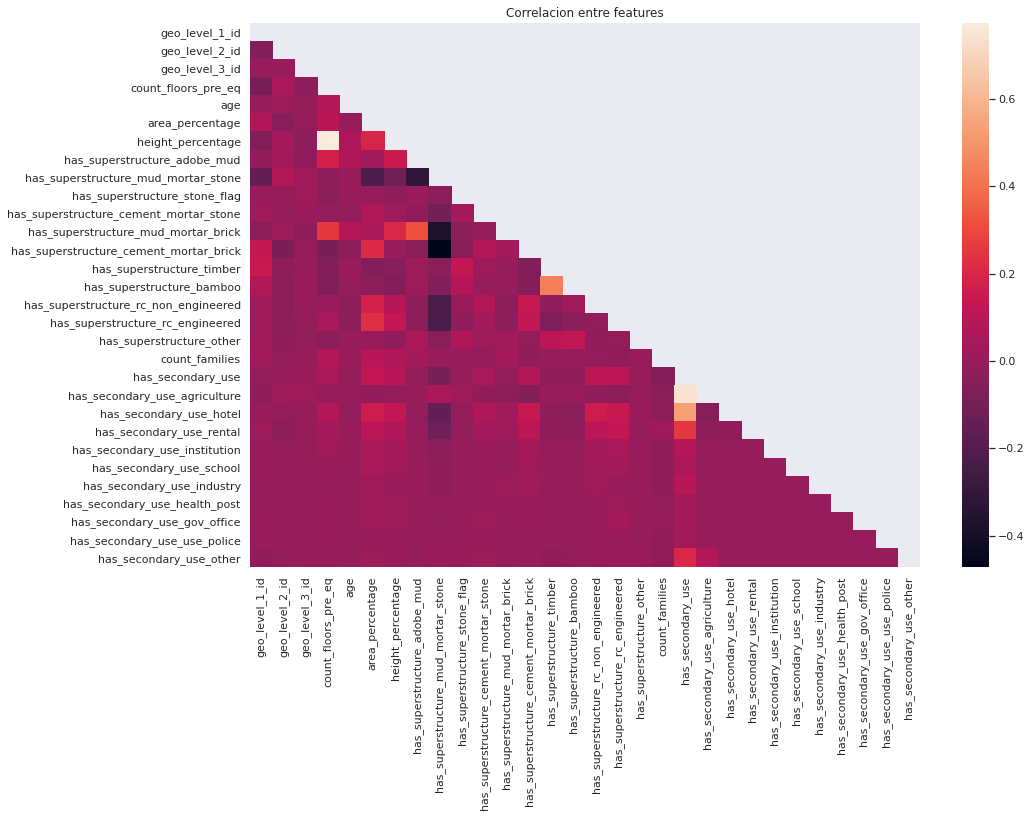

In [ ]:
features = train_values.drop(columns = ['building_id','damage_grade'])
corr_matrix = features.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, mask = mask)
plt.title("Correlacion entre features")

El analisis de esta visualizacion se detalla en el informe en el aparte de analisis de correlacion de features.

# Analisis Regional

## ¿Cuales fueron las regiones geograficas mas afectadas?

En el dataset provisto tenemos 3 columnas que nos indican la region geografica en la cual existe el edificio para un determinado buiding_id. En especial interesa la columna 'geo_level_1_id', la cual representa las regiones mas grandes (un total de 30 regiones).

Queremos analizar la proporcion de edificios que tengan un un 'damage_grade' igual a 3 dependiendo de la region.

In [ ]:
geo_levels = train_values.loc[train_values['damage_grade'] == 3, ['building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id']]
geoleveldm3 =  geo_levels.groupby('geo_level_1_id')['geo_level_2_id'].agg('count').to_frame().reset_index().rename(columns = {'geo_level_2_id':'count'})

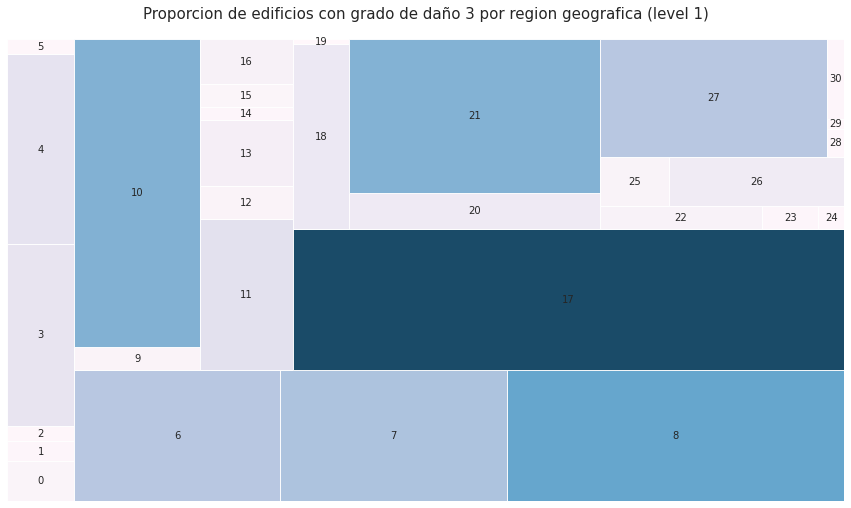

In [ ]:
norm = matplotlib.colors.Normalize(vmin = geoleveldm3['count'].min(), vmax = geoleveldm3['count'].max())
colors = [matplotlib.cm.PuBu(norm(value)) for value in geoleveldm3['count']]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15,8.5)
squarify.plot(label=geoleveldm3['geo_level_1_id'], sizes=geoleveldm3['count'], color = colors, alpha=.9)
plt.title("Proporcion de edificios con grado de daño 3 por region geografica (level 1)", fontsize = 15, pad=20)
plt.axis('off')
plt.show()

Mirando el grafico de arriba, podemos notar un conjunto de zonas que tienen la mayor proporcion de edificios con danio 3. 

Para ver las regiones mas afectadas, vamos a representar solo aquellas cuya cantidad de edificios dañados sea mayor al promedio de los edificios dañados para todas las regiones.

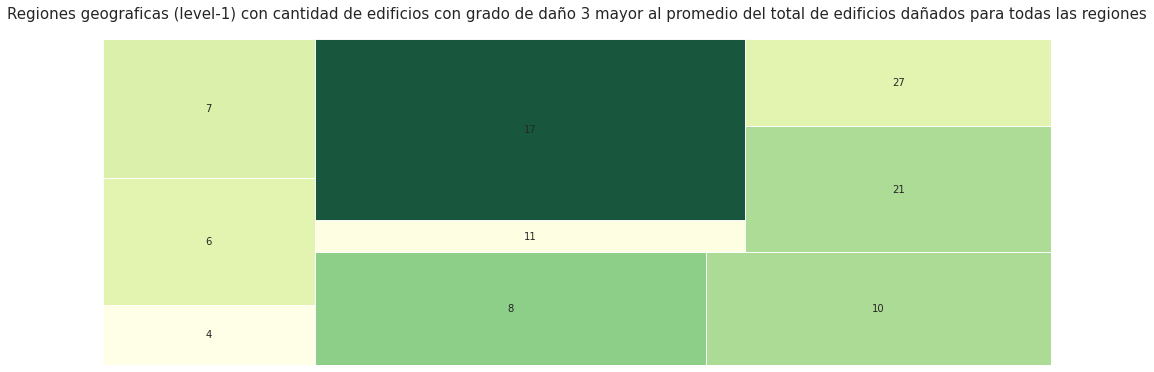

In [ ]:
nuevo = geoleveldm3.loc[geoleveldm3['count'] > geoleveldm3['count'].mean()]
norm = matplotlib.colors.Normalize(vmin = nuevo['count'].min(), vmax = nuevo['count'].max())
colors = [matplotlib.cm.YlGn(norm(value)) for value in nuevo['count']]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(17,6)
squarify.plot(label=nuevo['geo_level_1_id'], sizes=nuevo['count'], color = colors, alpha=.9)
plt.title("Regiones geograficas (level-1) con cantidad de edificios con grado de daño 3 mayor al promedio del total de edificios dañados para todas las regiones", fontsize = 15, pad=20)
plt.axis('off')
plt.show()

Esto ultimo, nos lleva a suponer que el epicentro del terremoto pudo haberse generado, muy problamente, en la region 17. Ademas, viendo los colores del treemap, podriamos pensar que estas regiones estan proximas. 

Como no sabemos la ubicacion geografica real de estas regiones, nos interesaria realizar un analisis para descubrir patrones en estas zonas, como por ejemplo la combinacion de materiales utilizados o la edad de los edificos, para de esta manera poder llegar a descubrir que valores de los atributos son mas propensos a llevar al edificio a tener un grado de daño mayor.

# Análisis del efecto de la antiguedad del edificio en el daño causado.

Procedemos a realizar el análisis del efecto de la antiguedad del edificio en el daño causado.

In [ ]:
train_values_merge = train_values.merge(train_labels, on='building_id')
#Descartamos los edificios con antiguedad mayor a 100 anios. 
train_values_merge = train_values_merge.loc[train_values_merge['age'] <= 100,:]

In [ ]:
train_values_merge = train_values_merge.groupby(['age','damage_grade' ]).agg({'building_id':'count'}).reset_index()
train_values_merge.rename(columns={'building_id':'total_buildings'},inplace=True)

<Figure size 1080x864 with 0 Axes>

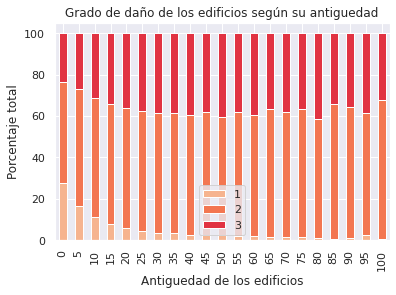

In [ ]:
#Graficamos
dataCrosstab=pd.crosstab(index=train_values_merge['age'],columns=train_values_merge['damage_grade'], values=train_values_merge['total_buildings'], aggfunc='sum',normalize='index')*100
fig = plt.figure(figsize= (15,12))
dataCrosstab.plot(kind='bar',stacked=True,title='Grado de daño de los edificios según su antiguedad');
plt.legend()
plt.ylabel('Porcentaje total')
plt.xlabel('Antiguedad de los edificios');

##Conclusiones
El predominante grado de daño entre todos los casos bajo observación es el correspondiente al daño medio (2).

Sólo los edificios con antiguedad menos a un año, tuvieron un porcentaje de daño del tipo 3 menor al de grado 1.

En los edificios con antiguedad menor a un año, el porcentaje de daño del tipo 3 (Serious damage) es menor al del grado 1 (Low damage). Esta característica sólo se da en este grupo de edificios. En el resto de los casos, el porcentaje de daño del grado tipo 3, supera el del grado 1.

Por último, la tendencia indica que a medida que aumenta la antiguedad, los edificios toleran menos el daño ocasionado por la catástrofe y más daño se ocasiona.

# Anasisis de combinacion de features 

## tipo superestructura usada + tipo piso (base) + tipo techo usado



Vamos a analizar que combinaciones de estos tres features poseen la mayor cantidad de edificios dañados para cada grado de daño.

Para esto creamos un nuevo feature llamado "superstructure_types" en donde detallamos todos los tipos de superestructuras que posee cada observacion. 

In [ ]:
materials_cols = ["has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone",
                  "has_superstructure_stone_flag","has_superstructure_cement_mortar_stone",
                  "has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick",
                  "has_superstructure_timber","has_superstructure_bamboo",
                  "has_superstructure_rc_non_engineered","has_superstructure_rc_engineered",
                  "has_superstructure_other"]

materials = train_values.loc[:,['building_id',"has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone",
                  "has_superstructure_stone_flag","has_superstructure_cement_mortar_stone",
                  "has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick",
                  "has_superstructure_timber","has_superstructure_bamboo",
                  "has_superstructure_rc_non_engineered","has_superstructure_rc_engineered",
                  "has_superstructure_other", "roof_type", "ground_floor_type"]]

def process(row) :
  return ", ".join(filter(lambda x: x != "", map(lambda mat: mat if row[mat] else "",materials_cols))).replace("has_superstructure_","")


# materials["superstructure_types"] = ", ".join(map(process,materials_cols)).replace("has_superstructure_","")
materials["superstructure_types"] = materials.apply(process, axis=1)


In [ ]:
materials_joined = materials.loc[:,['building_id', "superstructure_types","roof_type", "ground_floor_type"]]\
                      .merge(train_labels, on='building_id',how='inner').drop(columns = 'building_id')

materials_grade_3 = materials_joined.loc[materials_joined['damage_grade'] == 3,:].groupby(["superstructure_types","roof_type","ground_floor_type"])\
                    .count().sort_values(["damage_grade"], ascending=False).rename(columns = {'damage_grade':'count'})

materials_grade_2 = materials_joined.loc[materials_joined['damage_grade'] == 2,:].groupby(["superstructure_types","roof_type","ground_floor_type"])\
                    .count().sort_values(["damage_grade"], ascending=False).rename(columns = {'damage_grade':'count'})
                    
materials_grade_1 = materials_joined.loc[materials_joined['damage_grade'] == 1,:].groupby(["superstructure_types","roof_type","ground_floor_type"])\
                    .count().sort_values(["damage_grade"], ascending=False).rename(columns = {'damage_grade':'count'})
# Create bars
materials_grade_3_top5 = materials_grade_3.head(5).reset_index()
materials_grade_2_top5 = materials_grade_2.head(5).reset_index()
materials_grade_1_top5 = materials_grade_1.head(5).reset_index()

materials_grade_3_top5["combination"] = materials_grade_3_top5.apply(lambda x: "Superestructura usada: {} -Roof type: {} -Ground floor type: {}".format(x["superstructure_types"],x["roof_type"],x["ground_floor_type"]), axis=1)
materials_grade_2_top5["combination"] = materials_grade_2_top5.apply(lambda x: "Superestructura usada: {} -Roof type: {} -Ground floor type: {}".format(x["superstructure_types"],x["roof_type"],x["ground_floor_type"]), axis=1)
materials_grade_1_top5["combination"] = materials_grade_1_top5.apply(lambda x: "Superestructura usada: {} -Roof type: {} -Ground floor type: {}".format(x["superstructure_types"],x["roof_type"],x["ground_floor_type"]), axis=1)


<Figure size 432x288 with 0 Axes>

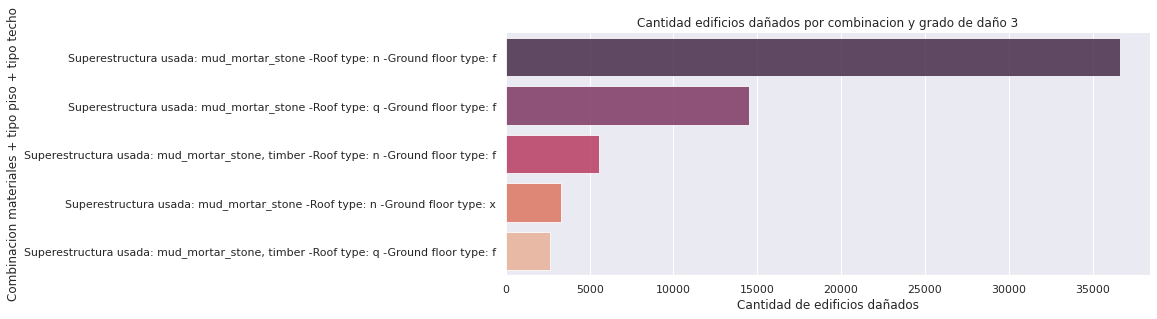

<Figure size 432x288 with 0 Axes>

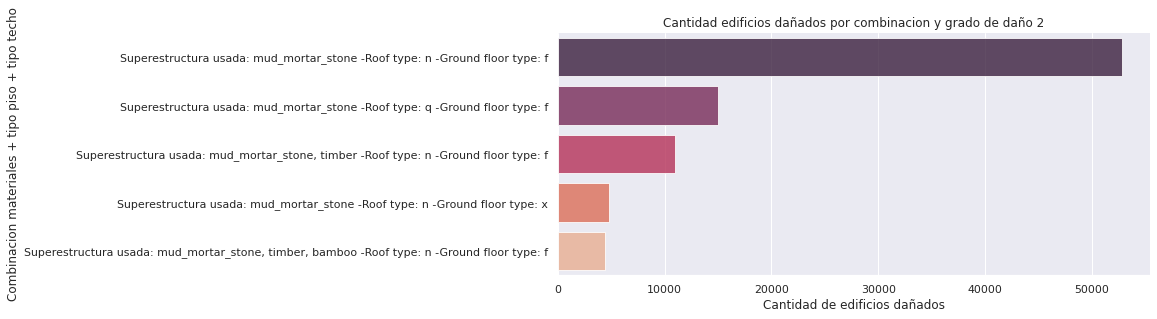

<Figure size 432x288 with 0 Axes>

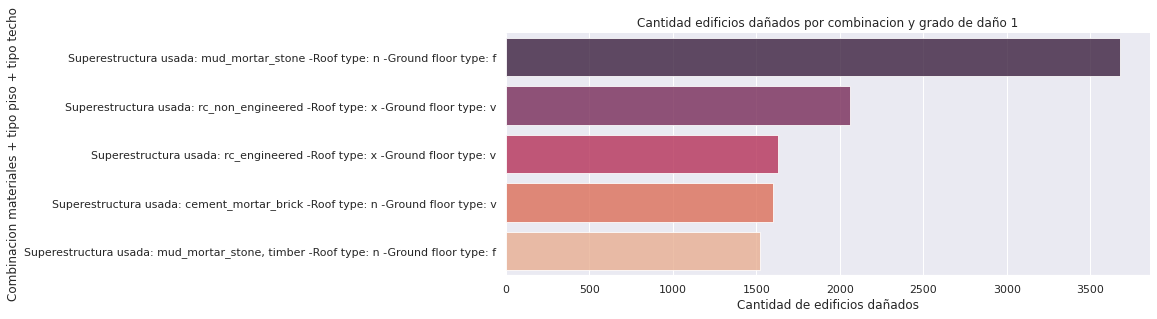

In [ ]:
def plot(df, title):
  plt.figure()

  grade3_plot = sns.catplot(data=df, kind="bar", y="combination", x="count", ci="sd", palette="rocket", alpha=.8, height=4, aspect=4)
  plt.title(title)
  grade3_plot.despine(left=True)
  grade3_plot.set_axis_labels("Cantidad de edificios dañados", "Combinacion materiales + tipo piso + tipo techo")
  

plot(materials_grade_3_top5, "Cantidad edificios dañados por combinacion y grado de daño 3")
plot(materials_grade_2_top5, "Cantidad edificios dañados por combinacion y grado de daño 2")
plot(materials_grade_1_top5, "Cantidad edificios dañados por combinacion y grado de daño 1")

Lo primero que podemos notar, es que para los tres grados de daño, la combinacion que acumula la mayor cantidad de edificios dañados es la misma: 


*   superstructure_types: mud_mortar_stone
*   Roof type: n
*   Ground floor type: f

Esto en parte, es lo esperado. Como habiamos descubierto anteriormente, la combinacion de roof_type=n y ground_floor_type=f era predominante en el dataset, y en su mayoria estas combinaciones estaban presentes en edificios que recibieron daño de grado 2 y 3.



## tipo superestructura usada + condicion superficie + tipo cimiento

In [ ]:
materials = train_values.loc[:,['building_id',"has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone",
                  "has_superstructure_stone_flag","has_superstructure_cement_mortar_stone",
                  "has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick",
                  "has_superstructure_timber","has_superstructure_bamboo",
                  "has_superstructure_rc_non_engineered","has_superstructure_rc_engineered",
                  "has_superstructure_other", "land_surface_condition", "foundation_type"]]

# materials["superstructure_types"] = ", ".join(map(process,materials_cols)).replace("has_superstructure_","")
materials["superstructure_types"] = materials.apply(process, axis=1)


In [ ]:
materials_joined = materials.loc[:,['building_id', "superstructure_types","land_surface_condition", "foundation_type"]]\
                      .merge(train_labels, on='building_id',how='inner').drop(columns = 'building_id')

materials_grade_3 = materials_joined.loc[materials_joined['damage_grade'] == 3,:].groupby(["superstructure_types","land_surface_condition","foundation_type"])\
                    .count().sort_values(["damage_grade"], ascending=False).rename(columns = {'damage_grade':'count'})

materials_grade_2 = materials_joined.loc[materials_joined['damage_grade'] == 2,:].groupby(["superstructure_types","land_surface_condition","foundation_type"])\
                   .count().sort_values(["damage_grade"], ascending=False).rename(columns = {'damage_grade':'count'})
                    
materials_grade_1 = materials_joined.loc[materials_joined['damage_grade'] == 1,:].groupby(["superstructure_types","land_surface_condition","foundation_type"])\
                   .count().sort_values(["damage_grade"], ascending=False).rename(columns = {'damage_grade':'count'})
 #Create bars
materials_grade_3_top5 = materials_grade_3.head(5).reset_index()
materials_grade_2_top5 = materials_grade_2.head(5).reset_index()
materials_grade_1_top5 = materials_grade_1.head(5).reset_index()

materials_grade_3_top5["combination"] = materials_grade_3_top5.apply(lambda x: "Superestructura usada: {} -Land surf cond: {} -Foundation type: {}".format(x["superstructure_types"],x["land_surface_condition"],x["foundation_type"]), axis=1)
materials_grade_2_top5["combination"] = materials_grade_2_top5.apply(lambda x: "Superestructura usada: {} -Land surf cond: {} -Foundation type: {}".format(x["superstructure_types"],x["land_surface_condition"],x["foundation_type"]), axis=1)
materials_grade_1_top5["combination"] = materials_grade_1_top5.apply(lambda x: "Superestructura usada: {} -Land surf cond: {} -Foundation type: {}".format(x["superstructure_types"],x["land_surface_condition"],x["foundation_type"]), axis=1)


<Figure size 432x288 with 0 Axes>

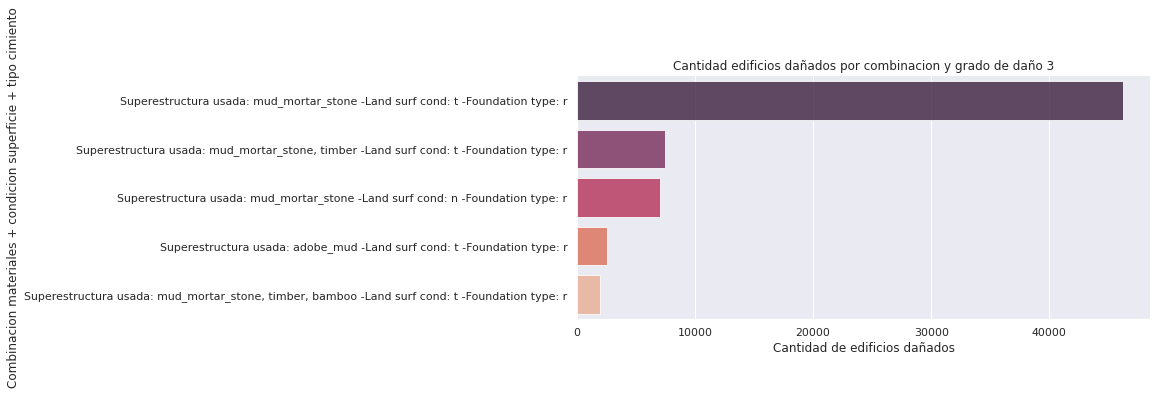

<Figure size 432x288 with 0 Axes>

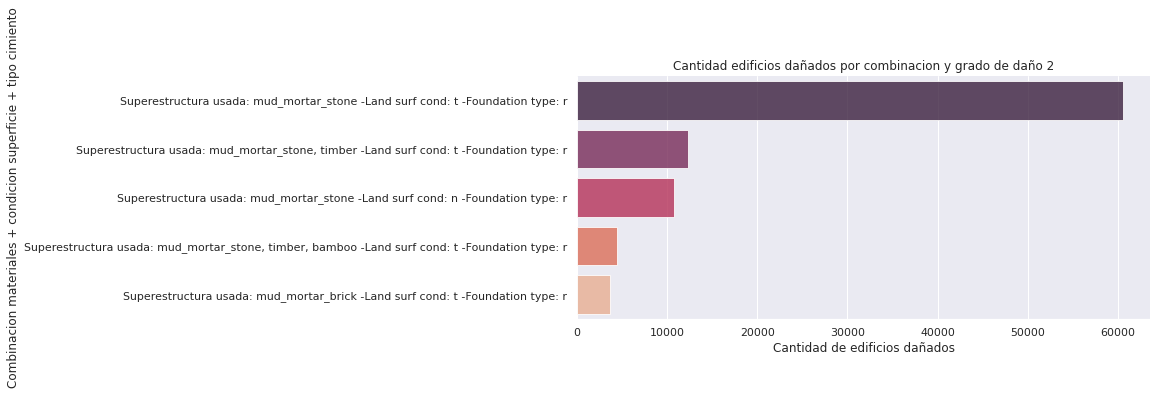

<Figure size 432x288 with 0 Axes>

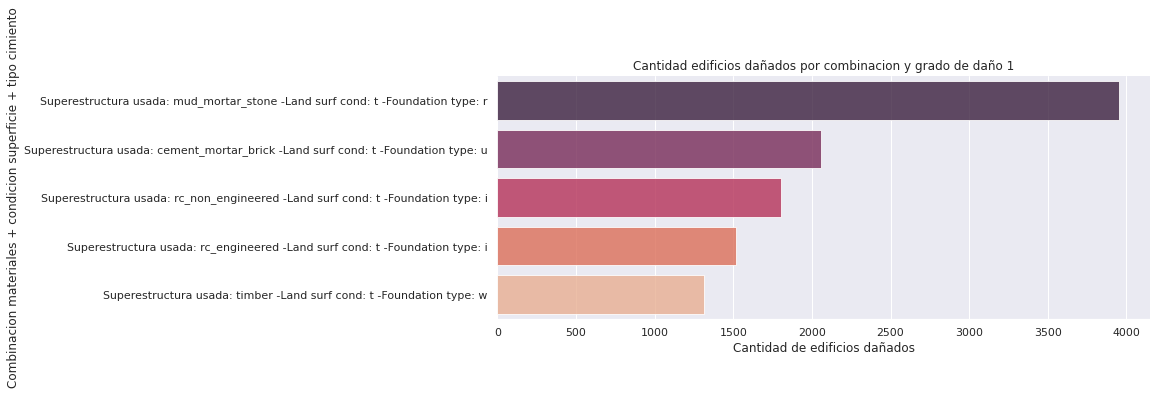

In [ ]:
def plot(df, title):
  plt.figure()

  grade3_plot = sns.catplot(data=df, kind="bar", y="combination", x="count", ci="sd", palette="CMRmap", alpha=.7, height=4, aspect=4)
  plt.title(title)
  grade3_plot.despine(left=True)
  grade3_plot.set_axis_labels("Cantidad de edificios dañados", "Combinacion materiales + condicion superficie + tipo cimiento")
  

plot(materials_grade_3_top5, "Cantidad edificios dañados por combinacion y grado de daño 3")
plot(materials_grade_2_top5, "Cantidad edificios dañados por combinacion y grado de daño 2")
plot(materials_grade_1_top5, "Cantidad edificios dañados por combinacion y grado de daño 1")

En estos ultimos plots podemos ver que tambien se cumple lo esperado, esto es, que las combinaciones predominantes que habiamos encontrado de land_surface_condition y foundation_type estan presentes.



##Conclusion

Con estos dos ultimos graficos, podemos ver que, junto con nuestros features land_surface_condition, foundation_condition, roof_type y ground_floor_type predominantes, para el superstructure_type mud_mortar_stone siempre tenemos la mayor cantidad de edificios dañados. 

## Combinaciones Tierra, Cimientos y Piso vs. Daño

In [ ]:
df1 = train_values.loc[:, ['building_id','foundation_type','ground_floor_type','land_surface_condition']]

df1 = df1.merge(train_labels, on = 'building_id').drop(columns = 'building_id')

In [ ]:
foundation_type_s = {'r':1,'w':2,'i':3,'u':4,'h':5}
df1['foundation_type'] = df1['foundation_type'].map(lambda x: foundation_type_s[x])
ground_floor_type_s = {'f':1,'x':2,'v':3,'z':4,'m':5}
df1['ground_floor_type'] = df1['ground_floor_type'].map(lambda x: ground_floor_type_s[x])
land_surface_condition_s = {'t':1,'o':2,'n':3}
df1['land_surface_condition'] = df1['land_surface_condition'].map(lambda x: land_surface_condition_s[x])

In [ ]:
df2 = df1.groupby(['foundation_type','ground_floor_type','land_surface_condition']).agg({'damage_grade':'mean'}).rename(columns = {'damage_grade':'damage_grade_average'}).reset_index().dropna()

In [ ]:

fig = go.Figure(data=
    go.Parcoords(
         line = dict(color = df2['damage_grade_average'],
                   colorscale = 'sunsetdark',
                    showscale = True,
                 cmin=1,
                 cmax=3),
        dimensions = list([
            dict(range = [1,3],
                label = 'land surface condition', values = df2['land_surface_condition']),
            dict(range = [1,5],
                label = 'foundation type', values = df2['foundation_type']),
            dict(range = [1,5],
                label = 'ground type floor', values = df2['ground_floor_type']),
            dict(range = [1,3],
                 label = 'damage grade average', values = df2['damage_grade_average'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [ ]:
df3 = df1.groupby(['foundation_type','ground_floor_type','land_surface_condition']).describe().reset_index()

In [ ]:
promedio_count = df3['damage_grade']['count'].mean()
promedio_count

3521.635135135135

In [ ]:
df4 = df3.loc[(df3['damage_grade']['count'] > promedio_count)]

In [ ]:
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df4['damage_grade']['mean'],
                   colorscale = 'sunsetdark',
                    showscale = True,
                 cmin=1,
                 cmax=3),
        dimensions = list([
            dict(range = [1,3],
                label = 'land surface condition', values = df4['land_surface_condition']),
            dict(range = [1,5],
                label = 'foundation type', values = df4['foundation_type']),
            dict(range = [1,5],
                label = 'ground type floor', values = df4['ground_floor_type']),
            dict(range = [1,3],
                 label = 'damage grade', values = df4['damage_grade']['mean'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

## Analisis de la relacion entre la edad y y la altura promedio 

Habiendo visto en el apartado de analisis de distribuciones que para edades mayores a 100 son insignificantes en cantidad, vamos a filtrar tomando este critero para una mejor visualizacion.

Text(0.5, 1.0, 'Propocion edificios por altura y edad')

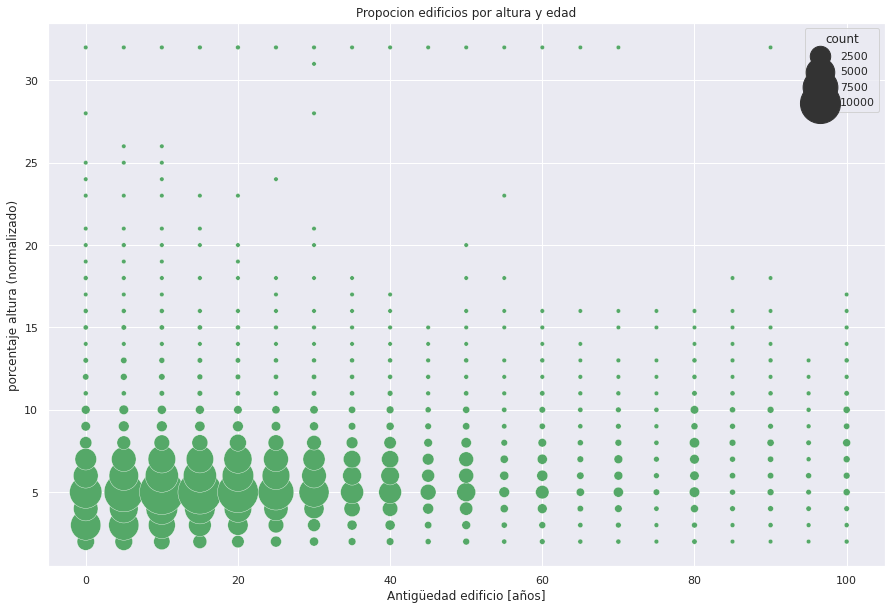

In [ ]:
df = train_values.loc[:, ['building_id','age','height_percentage']]
df = df.groupby(['age','height_percentage']).agg('count').reset_index().rename(columns = {'building_id':'count'})
df = df.loc[df['age'] <= 100]
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="age", y="height_percentage",legend=True, size="count", sizes=(20, 2000), color = 'g')
plt.xlabel('Antigüedad edificio [años]')
plt.ylabel('porcentaje altura (normalizado)')
plt.title('Propocion edificios por altura y edad')

Como era de esperarse, tenemos una gran concentracion de edficios con porcentaje de altura rondando los 5, tal como se habia visto en el plot de densidad para el feature height_percentage. Asi mismo, podemos ver tambien que la mayor concentracion se da para alturas entre 0 y 10 y antigüedades entre 0 y 40.  

#  Familias afectadas por grado de daño

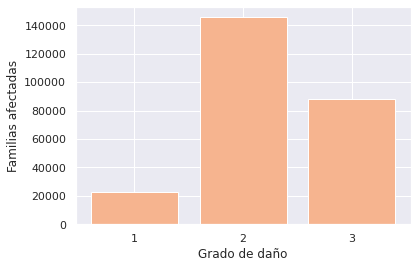

In [ ]:
withAffectedFamilies = train_values.loc[train_values["count_families"] > 0, ["building_id","count_families"]]
withValues = withAffectedFamilies.merge(train_labels)
familiesDamage = withValues.groupby(by="damage_grade").sum().reset_index()

fig, ax = plt.subplots()
ax.bar(familiesDamage["damage_grade"], height=familiesDamage["count_families"], tick_label=familiesDamage["damage_grade"])
ax.set_xlabel("Grado de daño")
ax.set_ylabel("Familias afectadas")
plt.title("Cantidad de familias por grado de daño")
plt.show()

La cantidad de familias afectadas por diferentes grados de daño, es la que se puede observar en el grafico de arriba, concentrandose la mayor cantidad en daño de grado 2 y 3.